### The project on Health Insurance Dataset. 
#### The goal is to explore how different features influence on the coast of treatment(parameter "charges"), and try to create the best prediction model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter('ignore')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#### Firstly we need to create DataFrame from csv file. Explore it and find some statistics indicators.




In [2]:
data = pd.read_csv("insurance.csv")
df = data.copy()

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### So there are 7 features: 3 of categorical and of 4 numeric data. The "charges" feature is numeric, that means that it's regression problem. There is no "Nan" objects in it.
#### After let's encode categorical features to create the heatmap of dataset. It can show the correlation between different parameters.


In [6]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.apply(LabelEncoder().fit_transform)

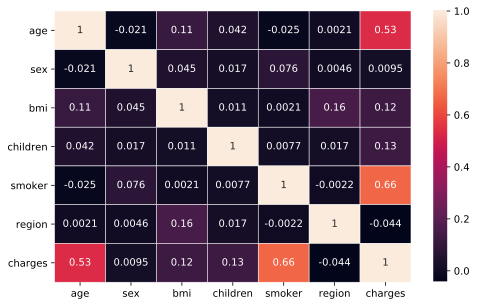

In [7]:
f, ax = plt.subplots(figsize=(8, 5));

sns.heatmap(df_encoded.corr(), annot=True, linewidths=.5);

#### The heatmap shows strong correlation between "charges" as goal feature and "age", "smoker" as features we should look closely. Other parameters doesn't have such value but let's make some dashboards to make sure of it.
                                            


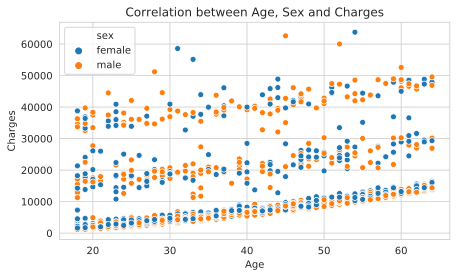

In [8]:
sns.set_style("whitegrid")

plt.figure(figsize=(7, 4));
sns.scatterplot(x="age", y="charges", data=df, hue="sex");
plt.xlabel("Age");
plt.ylabel("Charges");
plt.title("Correlation between Age, Sex and Charges");

#### The charges  feature increases with  age. We can see it on scatterplot and joinplot. There is no strong correlation with gender.

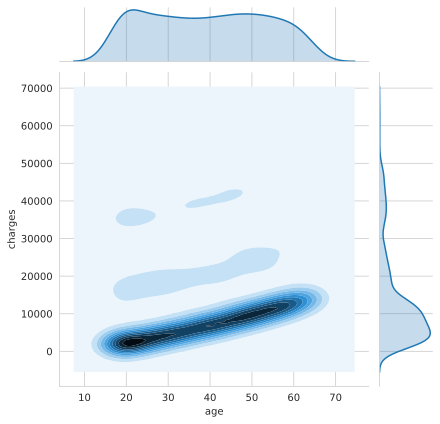

In [9]:
g = sns.jointplot(x="age", y="charges", data=df, kind="kde");

#### Charges for smokers are greater but there are more non-smokers than smokers.

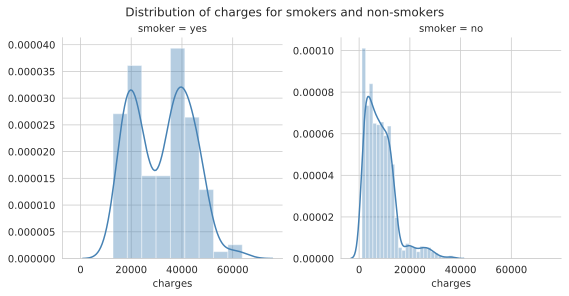

In [10]:
g = sns.FacetGrid(df, col="smoker", sharey=False, size=4);

g.map(sns.distplot, "charges", color="steelblue");
g.fig.suptitle('Distribution of charges for smokers and non-smokers',
               verticalalignment="bottom");

#### It's doesn't seems like bma feature has some influence on charges. The age parameter we discussed earlier. And each plot tells about strong influence of smoke feature.

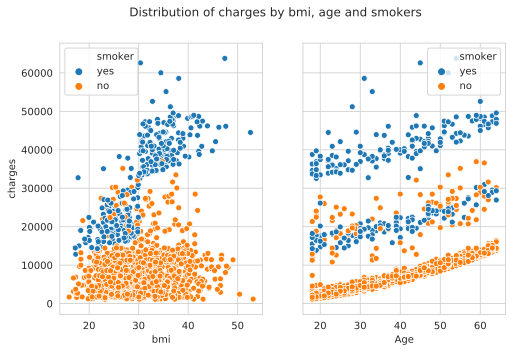

In [11]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 5));

sns.scatterplot(x="bmi", y="charges", data=df, hue="smoker", ax=axes[0]);
plt.xlabel("bmi");
plt.ylabel("Charges");
_.suptitle('Distribution of charges by bmi, age and smokers', fontsize=12)

sns.scatterplot(x="age", y="charges", data=df, hue="smoker", ax=axes[1]);
plt.xlabel("Age");
plt.ylabel("Charges");

#### The boxplots of region and children shows that it doesn't influence on charges.

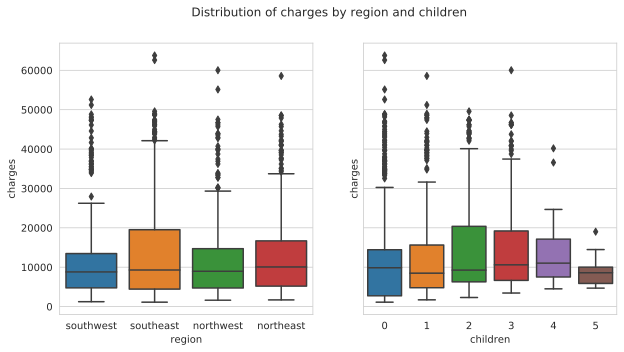

In [12]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5));
sns.boxplot(x="region", y="charges", data=df, ax=axes[0]);
sns.boxplot(x="children", y="charges", data=df);
_.suptitle('Distribution of charges by region and children', fontsize=12);

###  The conclusion of Data visualisation.
### As showed correlation matrix: "smoker" feature has the greatest influence on "charges". To solve the objective of regression, we should look on this first of all . But it looks like we cant ignore the other parameters due to small amount of  it.

#### Now it's time to create models. But first create dummy variables.

In [13]:
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### There are several methods to track the accuracy of model. First is to split the Dataset on training and test parts. Second is to look at coefficient of determination $R^2$ and mean squared error. Download it from sklearn library.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['charges'])
y = df['charges']

train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=0)

#### Linear regression would be the first model to create. It is basic model which results we will build on.

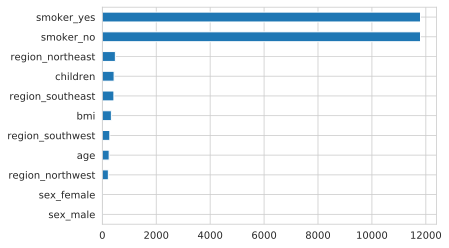

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X, train_y)

coefficients = lr.coef_

feature_importance = pd.Series(
    coefficients, index=train_X.columns).abs().sort_values(ascending=True)
feature_importance.plot.barh()
plt.show()

In [16]:
lr_pred_y = lr.predict(test_X)
lr_mse = mean_squared_error(test_y, lr_pred_y)

print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(
    lr_mse, np.math.sqrt(lr_mse), r2_score(test_y, lr_pred_y)))

Model mse: 3.18e+07, Model Rmse: 5.64e+03, Model r2: 0.7999876970680434


In [17]:
lr_cv = cross_val_score(lr, X, y, cv=10)

print("Accuracy: {:.3} (+/-{:.3})".format(lr_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.745 (+/-0.0859)


So the Linear regression model shows accuracy 0.745 on the cross validation. Not so bad.
Так как модель не переобучена нет смысла использовать регуляризацию и продолжать с моделью линейной регрессии.


In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(train_X)
poly = LinearRegression()
poly.fit(X_train_poly, train_y)

X1 = poly_features.fit_transform(X)

poly_cv = cross_val_score(poly, X1, y, cv=7)
print("Accuracy: {:.3} (+/-{:.3})".format(poly_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.786 (+/-0.0859)


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(train_X, train_y)

rf_pred_y = rf.predict(test_X)
rf_mse = mean_squared_error(test_y, rf_pred_y)
print('Model mse: {:0.3}, Model Rmse: {:0.3}, Model r2: {:1}'.format(
    rf_mse, np.math.sqrt(rf_mse), r2_score(test_y, rf_pred_y)))

Model mse: 1.88e+07, Model Rmse: 4.34e+03, Model r2: 0.8817078808586842


In [20]:
rf_cv = cross_val_score(rf, X, y, cv=7)

print("Accuracy: {:.3} (+/-{:.3})".format(rf_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.834 (+/-0.0859)


In [21]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'bootstrap': [True, False],
    "max_depth": [3, 5, 7, 10],
    "max_features": ['auto', 3, 4],
    "n_estimators": [50, 100, 150, 200],
    'criterion': ['mae', 'mse']
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=hyperparameters,
                           cv=3,
                           n_jobs=-1)

grid_search.fit(train_X, train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [22]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50}
0.8436490970566773


In [23]:
rf_greed = RandomForestRegressor(bootstrap=True,
                                 criterion="mse",
                                 max_depth=3,
                                 max_features="auto",
                                 n_estimators=100).fit(train_X, train_y)

rf_greed_cv = cross_val_score(rf_greed, X, y, cv=7)

print("Accuracy: {:.3} (+/-{:.3})".format(rf_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.834 (+/-0.0859)


In [24]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
hyperparameters = {
    'eta': [0.01, 0.1],
    'colsample_bytree': [0.4, 0.8,1],
    'gamma': [0, 0.03, 0.1],
    'min_child_weight': [1.5, 3, 6],
    'learning_rate': [0.1, 0.07],
    'max_depth': [3, 5],
    'n_estimators': [100, 1000],
    'subsample': [0.6, 0.95, 1.5]
}
xgb_model = xgboost.XGBRegressor()
n_iter_search = 100
random_search = RandomizedSearchCV(xgb_model,
                                   param_distributions=hyperparameters,
                                   n_iter=n_iter_search,
                                   n_jobs=-1,
                                   cv=3)

random_search.fit(X, y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.4, 0.8, 1],
                                        'eta': [0.01, 0

In [25]:
best_params = random_search.best_params_
best_score = random_search.best_score_
print(best_params)
print(best_score)

{'subsample': 0.95, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.07, 'gamma': 0.1, 'eta': 0.01, 'colsample_bytree': 1}
0.8585833621338889


In [26]:
parameters_for_testing = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.07],
    'min_child_weight': [2, 3, 4],
    'colsample_bytree': [0.8, 1, 1.5]
}
xgb_model = xgboost.XGBRegressor(eta=0.01, gamma=0, subsample=1, nthread=6)

gsearch = GridSearchCV(estimator=xgb_model,
                       param_grid=parameters_for_testing,
                       n_jobs=-1,
                       cv=3)
gsearch.fit(train_X, train_y)
print('best params')
print(gsearch.best_params_)
print('best score')
print(gsearch.best_score_)

best params
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100}
best score
0.8501146231633361


In [32]:
xgb_model = xgboost.XGBRegressor(n_estimators=100,
                                 eta=0.01,
                                 colsample_bytree=1,
                                 learning_rate=0.05,
                                 max_depth=3,
                                 min_child_weight=2,
                                 gamma=0,
                                 subsample=1,
                                 nthread=6)
xg_cv = cross_val_score(xgb_model , X, y, cv=10)

print("Accuracy: {:.3} (+/-{:.3})".format(xg_cv.mean(), xg_cv.std() * 2))

Accuracy: 0.861 (+/-0.0873)


Text(0, 0.5, 'Residual')

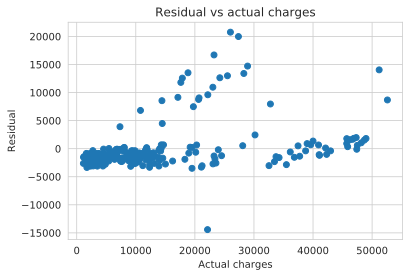

In [34]:
xgb_model.fit(train_X,train_y)
pred_y=xgb_model.predict(test_X)
residual = test_y - pred_y
# Positive residual means that the actual charge > predicted charge
# Negative residual means that the actual charge < predicted charge
plt.scatter(test_y, residual)
plt.title("Residual vs actual charges")
plt.xlabel("Actual charges")
plt.ylabel("Residual")

Text(0, 0.5, 'Residual')

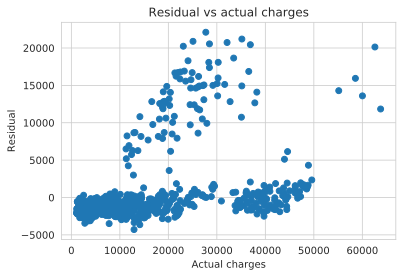

In [36]:
xgb_model.fit(train_X,train_y)
pred_y=xgb_model.predict(train_X)
residual = train_y - pred_y
# Positive residual means that the actual charge > predicted charge
# Negative residual means that the actual charge < predicted charge
plt.scatter(train_y, residual)
plt.title("Residual vs actual charges")
plt.xlabel("Actual charges")
plt.ylabel("Residual")